# Описание проекта

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. В наше распоряжение предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Требуется построить модель с предельно большим значением *F1*-меры(от 0.59 или выше). Дополнительно проверим *F1*-меру на тестовой выборке.

А так же будем измерять *AUC-ROC* и сравнивать её значение с *F1*-мерой.

   *© Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)* 

---
# Содержание проекта
<a id='start'></a>

### 1. Подготовка данных
   * <a href='#step_1'> Загружаем библиотеки </a>
   * <a href='#step_1.1'> Открокем файл по адресу (datasets/users_behavior.csv) и изучим данные</a>
   * <a href='#step_1.4'> Заполним недостающие данные </a>
   
   * <a href='#step_1.3'> Воспользуемся функцией `describe` для анализа всех данных в таблице</a>
   * <a href='#step_1.2'>Построим графики зависимостей значений в таблице для наглядного представления о распределнии данных</a>
   
### 2. Исследование задачи
   *<a href='#step_2'> Применим порядковое и прямое кодирование к данным в таблице при помощи функции `OrdinalEncoder ` и `pd.get_dummies()` </a>
   * <a href='#step_2.1.1'> Используем функцию `train_test_split` для разделения основного массива данных на `три` выборки 20% 20% 60% </a>
   * <a href='#step_2.1'> Проверим равномерность разделения данных при помощи функции `shape`</a>
   * <a href='#step_2.2'> Посмотрим на распределение классов в данных </a>

   * <a href='#step_2.3'> Приведём данные столбцоов '`CreditScore`','`Age','Balance`','`EstimatedSalary`' к одному масштабу</a>
       * <a href='#step_2.2.end'> Вывод</a>  
   * <a href='#step_2.4'> Выбор моделей без учёта дисбаланса</a>
       * <a href='#step_2.4'> Логистическая регрессия </a>
       * <a href='#step_2.5'> Деревья выбора (DecisionTree) </a>
       * <a href='#step_2.6'> Случайный лес (RandomForest) </a>              
   * <a href='#step_2.end'> Вывод </a>
   
### 3. Борьба с дисбалансом
   * <a href='#step_3'> Посмотрим на баланс распределения классов в данных</a>
   * <a href='#step_3.1'>Первый способ - `balanced`</a>
       * <a href='#step_3.1'>Логистическая регрессия balanced</a>
       * <a href='#step_3.1.1'>Деревья выбора (DecisionTree) balanced</a>
       
       * <a href='#step_3.2'> Случайный лес (RandomForest) balanced</a>
   * <a href='#step_3.3'> Второй способ борьбы с дисбалансом данных (увелиение количества примеров `upsample`)</a>
       * <a href='#step_3.3'> Создадим функцию, для увеличения выборки по первому [1] классу данных и уменьшение по нулевому [0] классу</a>
   * <a href='#step_3.4'> Проверим данные на наших моделях</a>
       * <a href='#step_3.4'> Логистическая регрессия </a>
       * <a href='#step_3.5'> Деревья выбора (DecisionTree)</a>
       * <a href='#step_3.6'> Случайный лес (RandomForest)</a>
   * <a href='#step_3.6.1'> Определим порог классификации</a>
   * <a href='#step_3.7'> Вычислим ROC-AUC для валидационной модели</a>
   * <a href='#step_3.8'> Сведём полученные данные по F1- мере в одну таблицу</a>

   * <a href='#step_3.end'> Вывод </a>
   
### 4. Тестирование модели
   * <a href='#step_4.1'> Протестируем нашу лучшую модель `Случайный лес (RandomForest)` на полных данных, включая валидационную выборку</a>
   * <a href='#step_4.2'> Обучим модель на полных данных и выведем показатели </a>
   * <a href='#step_4.3'> ROC-AUC для тестовой модели</a>
   * <a href='#step_4.end'> Вывод </a>

### 5. Вывод
   * <a href='#step_5.end'> Вывод </a>
   ---

<a id="step_1"></a>
# 1. Подготовка данных

   ## Загружаем библиотеки

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

<a id="step_1.1"></a>
### Откроем файл по адресу("*/datasets/Churn.csv*") и изучим данные

In [ ]:
data = pd.read_csv('Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


#### Посмотрим всю информацию о таблице с данными

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


<a id="step_1.4"></a>
### Заполним недостающие данные

##### Заполним недостающие значения по количеству владения недвижимостью `нулевым значением`, учитывая, что при заполнении данных в столбце "Tenure" оставляли пропуск, для клиентов с отсутствием недвижимости в собственности, а так же приведём значения в целочисленный формат

In [ ]:
data['Tenure']=data['Tenure'].fillna(0).astype('int')

Проверим все уникальные значения в столбце

In [ ]:
data['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

<a id="step_1.3"></a>
### Воспользуемся функцией `describe` для анализа всех данных в таблице

In [ ]:
data.describe(include="all")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,4.543400,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,3.111573,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,4.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


<a id="step_1.2"></a>
### Построим графики зависимостей значений в таблице для наглядного представления о распределнии данных

In [ ]:
pd.set_option('chained_assignment',None) 

In [ ]:
table_graph = data.drop(['RowNumber','CustomerId','HasCrCard','IsActiveMember','NumOfProducts'], axis=1)

Графики зависимости целевой метки от параметров в данных


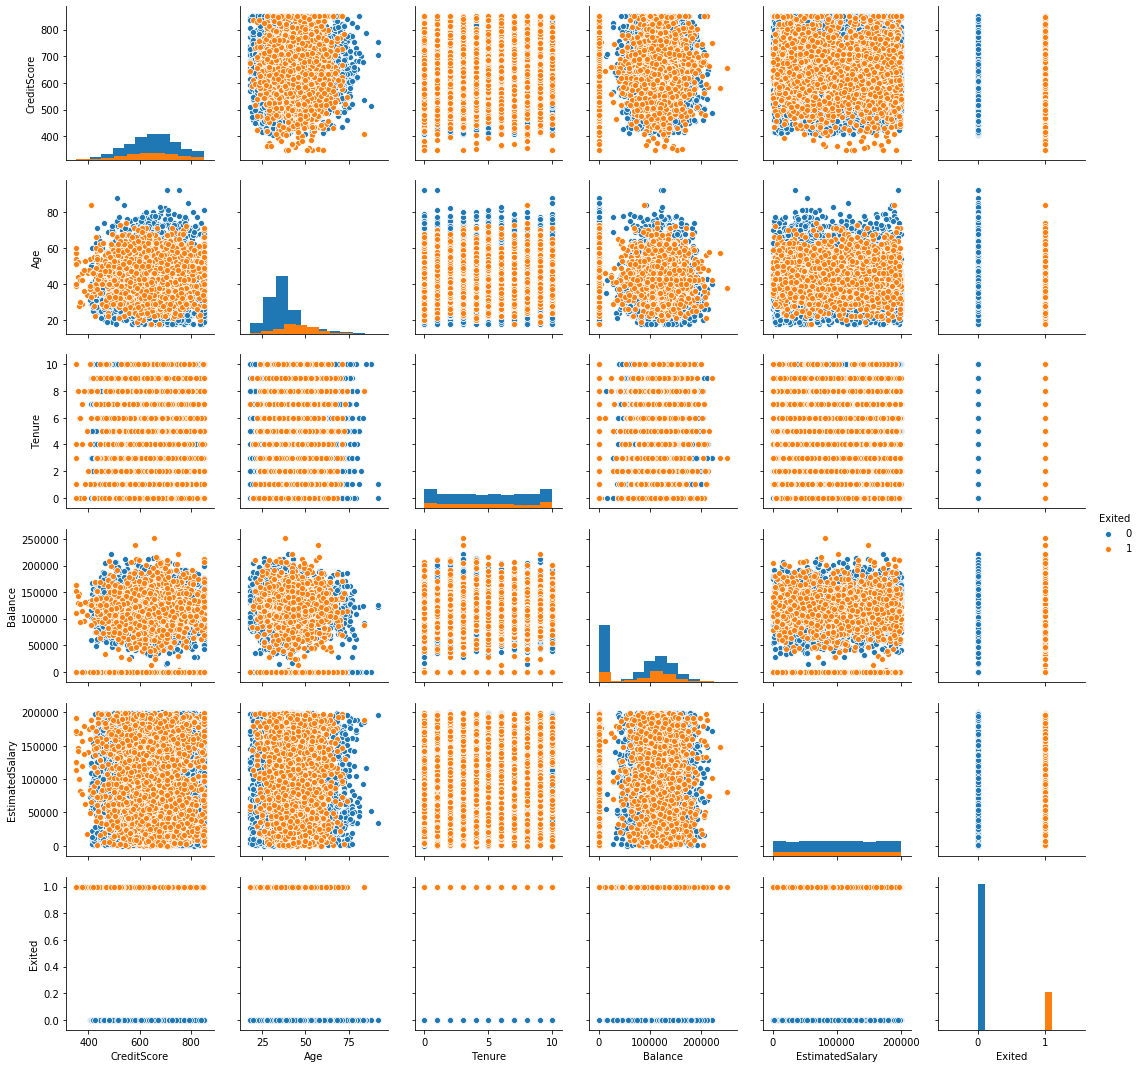

In [ ]:
print('Графики зависимости целевой метки от параметров в данных')
sns.pairplot(table_graph, hue='Exited', height=2.5, diag_kind='hist')
plt.show()

### Матрица корреляций

In [ ]:
data\
    .corr()\
    .style\
    .background_gradient(cmap='coolwarm')

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1,0.00420179,0.00168225,0.00584016,0.000782614,0.000595955,-0.00906669,0.00724625,0.000598747,0.0120444,-0.00598846,-0.0165714
CustomerId,0.00420179,1,0.00568909,0.0053079,0.00949687,-0.015747,-0.0124187,0.0169719,-0.0140251,0.00166496,0.0152707,-0.00624799
Surname,0.00168225,0.00568909,1,0.00748892,0.00554985,-0.00704127,0.00265728,-0.01646,-0.0089931,0.00148339,0.0118497,-0.0108219
CreditScore,0.00584016,0.0053079,0.00748892,1,-0.00396491,0.00308682,0.00626838,0.0122379,-0.00545848,0.0256513,-0.00138429,-0.0270935
Age,0.000782614,0.00949687,0.00554985,-0.00396491,1,-0.00736757,0.0283084,-0.0306801,-0.011721,0.0854721,-0.00720104,0.285323
Tenure,0.000595955,-0.015747,-0.00704127,0.00308682,-0.00736757,1,-0.00582065,0.0101064,0.0213866,-0.0258555,0.0112247,-0.0133192
Balance,-0.00906669,-0.0124187,0.00265728,0.00626838,0.0283084,-0.00582065,1,-0.30418,-0.0148583,-0.0100841,0.0127975,0.118533
NumOfProducts,0.00724625,0.0169719,-0.01646,0.0122379,-0.0306801,0.0101064,-0.30418,1,0.00318315,0.00961188,0.0142042,-0.0478199
HasCrCard,0.000598747,-0.0140251,-0.0089931,-0.00545848,-0.011721,0.0213866,-0.0148583,0.00318315,1,-0.0118656,-0.00993341,-0.00713777
IsActiveMember,0.0120444,0.00166496,0.00148339,0.0256513,0.0854721,-0.0258555,-0.0100841,0.00961188,-0.0118656,1,-0.0114214,-0.156128


---

<a href='#start'>Вернуться к оглавлению</a>
<a id="step_2"></a>
# 2. Исследование задачи

### Применим порядковое и прямое кодирование к данным в таблице при помощи функции `OrdinalEncoder ` и `pd.get_dummies()`

#### Проведём порядковое кодирование столбца `Surname`

In [ ]:
from sklearn.preprocessing import OrdinalEncoder 

In [ ]:
data['Surname'].value_counts()

Smith        32
Scott        29
Martin       29
Walker       28
Brown        26
             ..
Learmonth     1
Kamdibe       1
Grosse        1
Vance         1
Abbie         1
Name: Surname, Length: 2932, dtype: int64

In [ ]:
encoder = OrdinalEncoder() 
encoder.fit(data)
data_ordinal = pd.DataFrame(encoder.transform(data), columns=data.columns)

In [ ]:
data_ordinal['Surname'].value_counts()

2473.0    32
2389.0    29
1689.0    29
2751.0    28
336.0     26
          ..
2400.0     1
1980.0     1
247.0      1
1936.0     1
2112.0     1
Name: Surname, Length: 2932, dtype: int64

In [ ]:
data['Surname'] = (data_ordinal['Surname']).astype('int')

In [ ]:
data_ohe = pd.get_dummies(data, drop_first=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd99733c250>]],
      dtype=object)

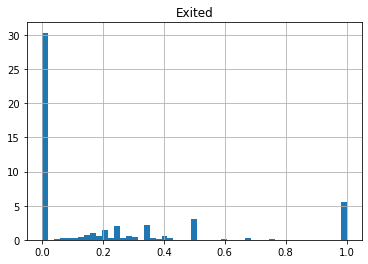

In [ ]:
data.groupby('Surname').agg({'Exited': 'mean'}).hist(bins=51, density=True)

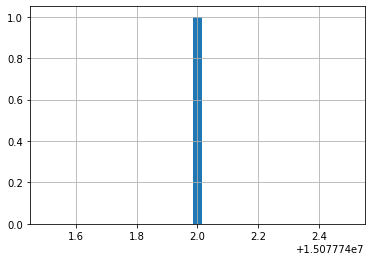

In [ ]:
data_ohe.filter(like='Surname').sum(axis=0).hist(bins=31)

<a id="step_2.1.1"></a>
### Выполним разделение данных на две части, основной "features" и "target"

In [ ]:
features = data_ohe.drop('Exited', axis=1)
target = data_ohe['Exited']

### Используем функцию `train_test_split` для разделения основного массива данных на `три` выборки 20% 20% 60%

#### Для начала отделим от основного массива данных 20% на тестовую выборку, для проверки моделей после обучения

In [ ]:
features_df, features_test, target_df, target_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

#### Выполним разделение оставшегося массива данных на две части 75% и 25% для построения и обучения модели

In [ ]:
features_train, features_valid, target_train, target_valid = train_test_split(features_df, target_df, test_size=0.25, random_state=42,  stratify=target_df)

<a id="step_2.1"></a>
### Проверим равномерность разделения данных при помощи функции `shape`

In [ ]:
print(features.shape,
features_df.shape,
features_valid.shape,
features_test.shape,
     features_train.shape)

(10000, 14) (8000, 14) (2000, 14) (2000, 14) (6000, 14)


In [ ]:
print(target.shape,
target_df.shape,
target_valid.shape,
target_test.shape,
target_train.shape)

(10000,) (8000,) (2000,) (2000,) (6000,)


In [ ]:
tv=target_valid.shape[0]/target.shape[0]
tt=target_train.shape[0]/target.shape[0]
test=target_test.shape[0]/target.shape[0]

print('Размер тренировочной выборки- {:.0%}'.format(tt))
print('Размер валидационной выборки - {:.0%}'.format(tv))
print('Размер тестовой выборки - {:.0%}'.format(test))

Размер тренировочной выборки- 60%
Размер валидационной выборки - 20%
Размер тестовой выборки - 20%


<a id="step_2.2"></a>
### Посмотрим на распределение классов в данных

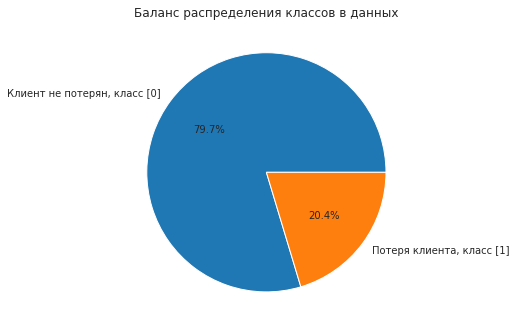

In [ ]:
sns.set_style('darkgrid')
target_valid.value_counts(normalize=True).plot(kind='pie',figsize=[5.5,5.5], legend=False, autopct='%1.1f%%',labels=['Клиент не потерян, класс [0]','Потеря клиента, класс [1]'])
plt.title('Баланс распределения классов в данных')
#plt.xlabel('Класс')
plt.ylabel('')
plt.show()

<a id="step_2.3"></a>
### Приведём данные столбцоов '`CreditScore`','`Age','Balance`','`EstimatedSalary`' к одному масштабу

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
print(features_df.shape)

(8000, 14)


In [ ]:
numeric=['CreditScore','Age','Balance','EstimatedSalary']
scaler=StandardScaler()
scaler.fit(features_df[numeric])
#scaler.fit(features_train[numeric])


features_train[numeric]=scaler.transform(features_train[numeric])
features_valid[numeric]=scaler.transform(features_valid[numeric])


print(features_train.shape)
print(features_valid.shape)

features_train.head()

(6000, 14)
(2000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
1995,1996,15617648,1802,-0.691088,0.480075,5,0.309649,2,1,1,0.119203,0,0,0
2724,2725,15812628,729,-2.047331,-0.089930,0,0.710165,1,1,0,0.522700,1,0,0
5224,5225,15718216,899,1.576218,0.385074,3,-1.226059,1,1,0,-0.482795,0,1,1
7697,7698,15637315,1784,-0.515087,0.195072,3,-1.226059,2,1,0,-0.791676,0,1,0
1226,1227,15775572,230,-1.239797,0.290073,6,0.191709,2,1,0,-0.427026,1,0,0


In [ ]:
print(features_df.shape)

(8000, 14)


<a id="step_2.2.end"></a>
### Вывод
Отлично! Объёмы данных из нашей таблицы распределены верно, согласно требованиям (60/20/20). Неоднородные данные приведены к одному масштабу. Посмотрим как ведут себя модели на наших даных.

<a id="step_2.4"></a>
## Выбор моделей без учёта дисбаланса

### Логистическая регрессия

In [ ]:
%%time

clf_lr = LogisticRegression(random_state=12345, solver='liblinear')
parametrs_lr = { 'C': range (1, 10),
              'max_iter': range (10,30,2),
              }
grid_lr = GridSearchCV(clf_lr, parametrs_lr, cv=3)
grid_lr.fit(features_train,target_train)
grid_lr.best_params_


CPU times: user 13.1 s, sys: 13.2 s, total: 26.3 s
Wall time: 26.3 s


{'C': 1, 'max_iter': 10}

In [ ]:
target_names=['Клиент не потерян','Клиент потерян']
model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=10, C=1)
model.fit(features_train,target_train)
predicted_lr= model.predict(features_valid)
f1_log_r_1 = f1_score(target_valid, predicted_lr)
print(classification_report(target_valid, predicted_lr, target_names=target_names))

                   precision    recall  f1-score   support

Клиент не потерян       0.80      1.00      0.89      1593
   Клиент потерян       0.00      0.00      0.00       407

         accuracy                           0.80      2000
        macro avg       0.40      0.50      0.44      2000
     weighted avg       0.63      0.80      0.71      2000



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<a id="step_2.5"></a>
### Деревья выбора (DecisionTree)

In [ ]:
%%time

best_model_dt = None
best_result_dt = 0
best_depth_dt=0
for depth in tqdm(range(10, 90, 2)):
      
    model_dt = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model_dt.fit(features_train,target_train) 
    result_dt = model_dt.score(features_valid,target_valid) 
    if result_dt > best_result_dt:
        best_model_dt = model_dt
        best_result_dt = result_dt 
          
        best_depth_dt = depth
print("Accuracy наилучшей модели на валидационной выборке:", best_result_dt, end='')
print(' C глубиной:',best_depth_dt)



Accuracy наилучшей модели на валидационной выборке: 0.8325 C глубиной: 10
CPU times: user 2.55 s, sys: 69.8 ms, total: 2.62 s
Wall time: 2.81 s


#### Посмотрим показатели наилучшей модели

In [ ]:
model_dt= DecisionTreeClassifier(random_state=12345, max_depth=best_depth_dt)
model_dt.fit(features_train,target_train)
predicted_dt=model_dt.predict(features_valid)
f1_forest_1 = f1_score(target_valid, predicted_dt)
print(classification_report(target_valid, predicted_dt, target_names=target_names))

                   precision    recall  f1-score   support

Клиент не потерян       0.88      0.92      0.90      1593
   Клиент потерян       0.61      0.49      0.54       407

         accuracy                           0.83      2000
        macro avg       0.74      0.71      0.72      2000
     weighted avg       0.82      0.83      0.83      2000



<a id="step_2.6"></a>
### Случайный лес (RandomForest)

In [ ]:
%%time
best_est_rf = 0
best_model_rf = None
best_result_rf = 0
best_depth_rf=0
for est in tqdm(range(10, 60, 10)):
    for depth in tqdm(range(1,60,2),desc='depth loop', leave=False):
        
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model_rf.fit(features_train,target_train) 
        result_rf = model_rf.score(features_valid,target_valid) 
        if result_rf > best_result_rf:
            best_model_rf = model_rf 
            best_result_rf = result_rf 
            best_est_rf = est
            best_depth_rf = depth
print("Accuracy наилучшей модели на валидационной выборке:", best_result_rf, end='')
print(' C количеством деревьев:',best_est_rf, end=' ')
print('И глубиной:',best_depth_rf)


Accuracy наилучшей модели на валидационной выборке: 0.859 C количеством деревьев: 40 И глубиной: 11
CPU times: user 51.2 s, sys: 329 ms, total: 51.5 s
Wall time: 52.7 s


#### Посмотрим показатели наилучшей модели

In [ ]:
model_tree = RandomForestClassifier(random_state=12345, n_estimators=best_est_rf,  max_depth=best_depth_rf)
model_tree.fit(features_train,target_train)
predicted_tree=model_tree.predict(features_valid)
f1_random_forest_1 = f1_score(target_valid, predicted_tree)
print(classification_report(target_valid, predicted_tree, target_names=target_names))

                   precision    recall  f1-score   support

Клиент не потерян       0.87      0.97      0.92      1593
   Клиент потерян       0.80      0.41      0.54       407

         accuracy                           0.86      2000
        macro avg       0.83      0.69      0.73      2000
     weighted avg       0.85      0.86      0.84      2000



#### матрица предсказаний наилучшей модели без учёта дисбаланса данных

In [ ]:
print(confusion_matrix(target_valid, predicted_tree))

[[1550   43]
 [ 239  168]]


### Сведём интересующие нас данные в одну таблицу для наглядности

In [ ]:
comparison_tabl = pd.DataFrame(index=['F1-мера'], columns=['Дерево решений','Cлучайный лес','Логистическая регрессия'])
comparison_tabl['Дерево решений'] = f1_forest_1
comparison_tabl['Cлучайный лес'] = f1_random_forest_1
comparison_tabl['Логистическая регрессия'] = f1_log_r_1
comparison_tabl

,Дерево решений,Cлучайный лес,Логистическая регрессия
F1-мера,0.544218,0.543689,0.0


<a id="step_2.end"></a>
## Вывод 

При первом взгляде на себя обращает внимание модель `DecisionTree`,в то время как `Логистическая регрессия` не справилась с требованием и при высоком `accuracy`, значение `F1` оказалось равным '*0*'. Но до требуемого значения меры `F1` более *0,59* нам ещё далеко. Узнаем на сколько качественно распределены данные в этих выборках в следующей главе.


---

<a href='#start'>Вернуться к оглавлению</a>
<a id="step_3"></a>

# 3. Борьба с дисбалансом

## Посмотрим на баланс распределения классов в данных

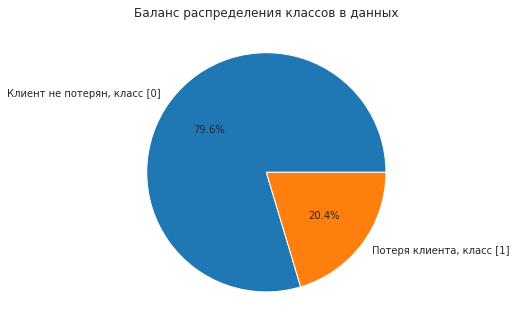

In [ ]:
target.value_counts(normalize=True).plot(kind='pie',figsize=[5.5,5.5], legend=False, autopct='%1.1f%%',labels=['Клиент не потерян, класс [0]','Потеря клиента, класс [1]'])
plt.title('Баланс распределения классов в данных')
#plt.xlabel('Класс')
plt.ylabel('')
plt.show()

<a id="step_3.1"></a>
## Первый способ установить параметр модели - `balanced`

### Логистическая регрессия `balanced`

In [ ]:
model_b = LogisticRegression(random_state=12345, solver='liblinear',class_weight='balanced')
model_b.fit(features_train, target_train)
predicted_balance = model_b.predict(features_valid)
print(classification_report(target_valid, predicted_balance, target_names=target_names))

                   precision    recall  f1-score   support

Клиент не потерян       0.80      0.49      0.61      1593
   Клиент потерян       0.20      0.50      0.29       407

         accuracy                           0.49      2000
        macro avg       0.50      0.50      0.45      2000
     weighted avg       0.67      0.49      0.54      2000



<a id="step_3.1.1"></a>
### Деревья выбора (DecisionTree) `balanced`

In [ ]:
model_dt= DecisionTreeClassifier(random_state=12345, max_depth=best_depth_dt, class_weight='balanced')
model_dt.fit(features_train,target_train)
predicted_dt=model_dt.predict(features_valid)
f1_forest_1 = f1_score(target_valid, predicted_dt)
print(classification_report(target_valid, predicted_dt, target_names=target_names))

                   precision    recall  f1-score   support

Клиент не потерян       0.90      0.79      0.85      1593
   Клиент потерян       0.45      0.67      0.54       407

         accuracy                           0.77      2000
        macro avg       0.68      0.73      0.69      2000
     weighted avg       0.81      0.77      0.78      2000



<a id="step_3.2"></a>
### Случайный лес (RandomForest) `balanced`

In [ ]:
model_rf_b = RandomForestClassifier(random_state=12345, class_weight='balanced', n_estimators=best_est_rf,  max_depth=best_depth_rf)
model_rf_b.fit(features_train,target_train)
predicted_rf_b=model_rf_b.predict(features_valid)
print(classification_report(target_valid, predicted_rf_b, target_names=target_names))

                   precision    recall  f1-score   support

Клиент не потерян       0.89      0.93      0.91      1593
   Клиент потерян       0.65      0.53      0.58       407

         accuracy                           0.85      2000
        macro avg       0.77      0.73      0.74      2000
     weighted avg       0.84      0.85      0.84      2000



<a id="step_3.3"></a>
## Второй способ борьбы с дисбалансом данных (увелиение и уменьшение количества примеров `upsample` и `downsample`)

### Создадим функцию, для увеличения выборки по первому [1] классу данных и уменьшению выборки по нулевому [0] классу 

In [ ]:
def down_up_sample(features, target, fraction, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_down_up = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones]*repeat)
    target_down_up = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones]*repeat)
    
    features_down_up_sampled, target_down_up_sampled = shuffle(
        features_down_up, target_down_up, random_state=12345)
    
    return features_down_up_sampled, target_down_up_sampled

features_upsampled, target_upsampled  = down_up_sample(features_train, target_train, 0.5, 2)

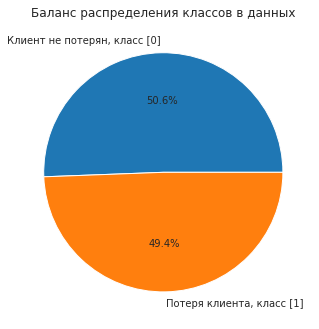

In [ ]:
target_upsampled.value_counts(normalize=True).plot(kind='pie',figsize=[5.5,5.5], legend=False, autopct='%1.1f%%',labels=['Клиент не потерян, класс [0]','Потеря клиента, класс [1]'])
plt.title('Баланс распределения классов в данных')
#plt.xlabel('Класс')
plt.ylabel('')
plt.show()

<a id="step_3.4"></a>
## Проверим данные на наших моделях

### Логистическая регрессия

In [ ]:
%%time

clf_lr = LogisticRegression(random_state=12345, solver='liblinear',class_weight='balanced')
parametrs_lr = { 'C': range (1, 10),
              'max_iter': range (40,70,10),
              }
grid_lr = GridSearchCV(clf_lr, parametrs_lr, cv=3)
grid_lr.fit(features_upsampled,target_upsampled)
grid_lr.best_params_


CPU times: user 9.35 s, sys: 6.9 s, total: 16.3 s
Wall time: 16.3 s


{'C': 8, 'max_iter': 40}

#### Посмотрим показатели наилучшей модели

In [ ]:
model_up = LogisticRegression(random_state=12345, solver='liblinear',class_weight='balanced', C=8, max_iter=40)
model_up.fit(features_upsampled,target_upsampled)
predicted_up = model_up.predict(features_valid)

f1_log_r = f1_score(target_valid, predicted_up)
print(classification_report(target_valid, predicted_up, target_names=target_names))

                   precision    recall  f1-score   support

Клиент не потерян       0.89      0.73      0.80      1593
   Клиент потерян       0.38      0.65      0.48       407

         accuracy                           0.71      2000
        macro avg       0.64      0.69      0.64      2000
     weighted avg       0.79      0.71      0.74      2000



<a id="step_3.5"></a>
### Деревья выбора (DecisionTree)

In [ ]:
%%time

best_model_dt_up = None
best_result_dt_up = 0
best_depth_dt_up =0
for depth in tqdm(range(2, 70, 2)):
      
    model_dt_up = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced') 
    model_dt_up.fit(features_upsampled,target_upsampled) 
    result_dt_up = model_dt_up.score(features_valid,target_valid) 
    if result_dt_up > best_result_dt_up:
        best_model_dt_up = model_dt_up
        best_result_dt_up = result_dt_up
          
        best_depth_dt_up = depth
print("Accuracy наилучшей модели на валидационной выборке:", best_result_dt_up, end='')
print(' C глубиной:',best_depth_dt_up)


Accuracy наилучшей модели на валидационной выборке: 0.7635 C глубиной: 8
CPU times: user 1.47 s, sys: 16.9 ms, total: 1.49 s
Wall time: 1.65 s


#### Посмотрим показатели наилучшей модели

In [ ]:
model_dt_up = DecisionTreeClassifier(random_state=12345,max_depth=best_depth_dt_up,class_weight='balanced')
model_dt_up.fit(features_upsampled,target_upsampled)
predicted_dt_up=model_dt_up.predict(features_valid)
f1_forest = f1_score(target_valid, predicted_dt_up)
print(classification_report(target_valid, predicted_dt_up, target_names=target_names))

                   precision    recall  f1-score   support

Клиент не потерян       0.91      0.78      0.84      1593
   Клиент потерян       0.45      0.72      0.55       407

         accuracy                           0.76      2000
        macro avg       0.68      0.75      0.70      2000
     weighted avg       0.82      0.76      0.78      2000



<a id="step_3.6"></a>
### Случайный лес (RandomForest)

In [ ]:
%%time
best_est_rf = 0
best_model_rf = None
best_result_rf = 0
best_depth_rf=0
for est in tqdm(range(10, 70, 10)):
    for depth in tqdm(range(1,60,2), desc='depth loop', leave=False):
        
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth,class_weight='balanced') 
        model_rf.fit(features_upsampled,target_upsampled) 
        result_rf = model_rf.score(features_valid,target_valid) 
        if result_rf > best_result_rf:
            best_model_rf = model_rf 
            best_result_rf = result_rf 
            best_est_rf = est
            best_depth_rf = depth
print("Accuracy наилучшей модели на валидационной выборке:", best_result_rf, end='')
print(' C количеством деревьев:',best_est_rf, end=' ')
print('И глубиной:',best_depth_rf)


Accuracy наилучшей модели на валидационной выборке: 0.8325 C количеством деревьев: 60 И глубиной: 21
CPU times: user 54.2 s, sys: 345 ms, total: 54.6 s
Wall time: 56.3 s


#### Посмотрим показатели наилучшей модели

In [ ]:
model_r = RandomForestClassifier(random_state=12345, n_estimators=best_est_rf, max_depth=best_depth_rf,class_weight='balanced')
model_r.fit(features_upsampled,target_upsampled)
predicted_rf=model_r.predict(features_valid)
f1_random_forest = f1_score(target_valid, predicted_rf)
print(classification_report(target_valid, predicted_rf, target_names=target_names))

                   precision    recall  f1-score   support

Клиент не потерян       0.91      0.88      0.89      1593
   Клиент потерян       0.58      0.67      0.62       407

         accuracy                           0.83      2000
        macro avg       0.74      0.77      0.76      2000
     weighted avg       0.84      0.83      0.84      2000



#### матрица предсказаний наилучшей модели c учётом дисбаланса данных

In [ ]:
print(confusion_matrix(target_valid, predicted_rf))

[[1394  199]
 [ 136  271]]


##### По результату сравнения трёх моделей, на первое место по показателю метрики F1 выходит модель `Случайный лес(RandomForest)` со значением f1=*0.62*, продолжим развивать её и выберем для неё порог классификации.

<a id="step_3.6.1"></a>
## Определим порог классификации для модели `RandomForestClassifier`

In [ ]:
model_tree = RandomForestClassifier(random_state=12345, n_estimators=best_est_rf, max_depth=best_depth_rf,class_weight='balanced')
model_tree.fit(features_upsampled,target_upsampled)
probabilities_valid=model_tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("Вероятность положительного класса:",probabilities_one_valid[:5])

Вероятность положительного класса: [0.08333333 0.23333333 0.73333333 0.41666667 0.21666667]


In [ ]:
for threshold in np.arange(0.3, 0.7, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid,predicted_valid)
    recall = recall_score(target_valid,predicted_valid) 
    f1 = f1_score(target_valid,predicted_valid)
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Порог = 0.30 | Точность = 0.372, Полнота = 0.870, F1 = 0.521
Порог = 0.32 | Точность = 0.392, Полнота = 0.862, F1 = 0.539
Порог = 0.34 | Точность = 0.405, Полнота = 0.838, F1 = 0.546
Порог = 0.36 | Точность = 0.427, Полнота = 0.826, F1 = 0.563
Порог = 0.38 | Точность = 0.448, Полнота = 0.813, F1 = 0.578
Порог = 0.40 | Точность = 0.475, Полнота = 0.774, F1 = 0.589
Порог = 0.42 | Точность = 0.495, Полнота = 0.754, F1 = 0.598
Порог = 0.44 | Точность = 0.508, Полнота = 0.744, F1 = 0.604
Порог = 0.46 | Точность = 0.531, Полнота = 0.725, F1 = 0.613
Порог = 0.48 | Точность = 0.542, Полнота = 0.703, F1 = 0.612
Порог = 0.50 | Точность = 0.577, Полнота = 0.666, F1 = 0.618
Порог = 0.52 | Точность = 0.589, Полнота = 0.641, F1 = 0.614
Порог = 0.54 | Точность = 0.604, Полнота = 0.622, F1 = 0.613
Порог = 0.56 | Точность = 0.631, Полнота = 0.604, F1 = 0.617
Порог = 0.58 | Точность = 0.646, Полнота = 0.582, F1 = 0.612
Порог = 0.60 | Точность = 0.675, Полнота = 0.545, F1 = 0.603
Порог = 0.62 | Точность 

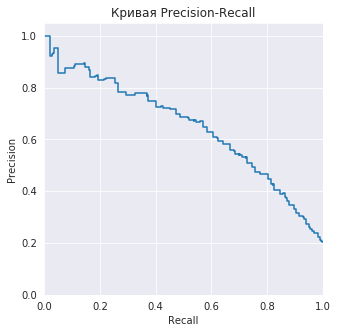

In [ ]:
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])
plt.figure(figsize=(5, 5))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

Пороговое значение 0,5 выглидит наиболее оптимальным для нашей модели

In [ ]:
predicted_rf_threshold=(probabilities_one_valid>0.5)*1
predicted_rf_threshold.shape

(2000,)

In [ ]:
f1_random_forest_t = f1_score(target_valid, predicted_rf_threshold)
print(classification_report(target_valid,predicted_rf_threshold, target_names=target_names))

                   precision    recall  f1-score   support

Клиент не потерян       0.91      0.88      0.89      1593
   Клиент потерян       0.58      0.67      0.62       407

         accuracy                           0.83      2000
        macro avg       0.74      0.77      0.76      2000
     weighted avg       0.84      0.83      0.84      2000



In [ ]:
print(confusion_matrix(target_valid, predicted_rf_threshold))

[[1394  199]
 [ 136  271]]


<a id="step_3.7"></a>
## Вычислим ROC-AUC для валидационной модели

In [ ]:
probabilities_valid = model_r.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
print('ROC-AUC: {:.2f}'.format(auc_roc))

ROC-AUC: 0.85


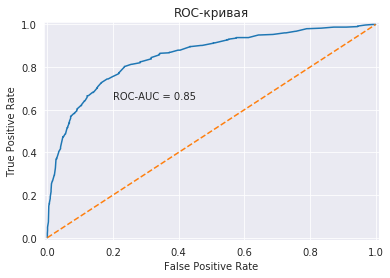

In [ ]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.text(0.2,0.65,'ROC-AUC = {:.2f}'.format(auc_roc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

<a id="step_3.8"></a>
### Сведём полученные данные по F1- мере в одну таблицу

In [ ]:
comparison_table = pd.DataFrame(index=['F1-мера'], columns=['Дерево решений','Cлучайный лес','Логистическая регрессия'])
comparison_table['Дерево решений'] = f1_forest
comparison_table['Cлучайный лес'] = f1_random_forest_t
comparison_table['Логистическая регрессия'] = f1_log_r
comparison_table

,Дерево решений,Cлучайный лес,Логистическая регрессия
F1-мера,0.552507,0.618016,0.481884


<a id="step_3.end"></a>
## Вывод 

Проверив модели на разных вариантах приведения классов к балансу, можно сделать вывод, о том что параметр `balancet` меньше всего влияет на предсказание и итоговый score. Более эффективны способы увеличения `upsampling` и уменьшения `downsampling` классовой выборки совместно с выбором порогового значения. При использовании данных методов наша модель `random_forest` показала наивысшее значение меры `F1` = *0.618*. Таким образом мы достигли требуемого значеиня в *0,59* на валидационной выборке.

---

<a href='#start'>Вернуться к оглавлению</a>
<a id="step_4"></a>
# 4. Тестирование модели

<a id="step_4.1"></a>
## Протестируем нашу лучшую модель `Случайный лес (RandomForest)` на полных данных, включая валидационную выборку

##### Для этого приведём её к балансу классов при помощи нашей функции `down_up_sample`

In [ ]:
features_upsampled_test, target_upsampled_test = down_up_sample(features_df, target_df, 0.5, 2)

#####  Проверим распределение

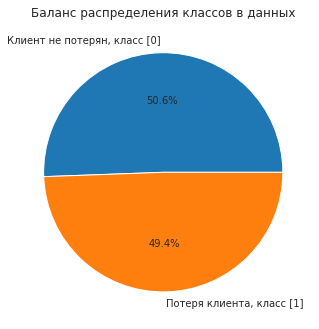

In [ ]:
target_upsampled_test.value_counts(normalize=True).plot(kind='pie',figsize=[5.5,5.5], legend=False, autopct='%1.1f%%',labels=['Клиент не потерян, класс [0]','Потеря клиента, класс [1]'])
plt.title('Баланс распределения классов в данных')
#plt.xlabel('Класс')
plt.ylabel('')
plt.show()

<a id="step_4.2"></a>
## Обучим модель на полных данных и выведем показатели

In [ ]:
%%time
model_test = RandomForestClassifier(random_state=12345, n_estimators=best_est_rf, max_depth=best_depth_rf,class_weight='balanced')
model_test.fit(features_upsampled_test,target_upsampled_test)
predicted_test=(model_test.predict_proba(features_test)[:,1] > 0.5)*1

print(classification_report(target_test, predicted_test, target_names=target_names))

                   precision    recall  f1-score   support

Клиент не потерян       0.91      0.87      0.89      1593
   Клиент потерян       0.57      0.67      0.62       407

         accuracy                           0.83      2000
        macro avg       0.74      0.77      0.75      2000
     weighted avg       0.84      0.83      0.84      2000

CPU times: user 686 ms, sys: 4.12 ms, total: 690 ms
Wall time: 700 ms


#### матрица предсказаний наилучшей модели на тестовых данных

In [ ]:
print('Матрица предсказаний:\n\n',confusion_matrix(target_test, predicted_test))

Матрица предсказаний:

 [[1391  202]
 [ 135  272]]


In [ ]:
probabilities_test = model_test.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test,probabilities_one_test)
print('ROC-AUC: {:.2f}'.format(auc_roc))

ROC-AUC: 0.85


<a id="step_4.3"></a>
## ROC-AUC для тестовой модели

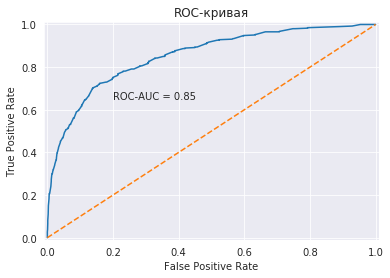

In [ ]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.text(0.2,0.65,'ROC-AUC = {:.2f}'.format(auc_roc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

### Проверим показатели константной модели при помощи `DummyClassifier`

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent",random_state=123)
dummy_clf.fit(features_df,target_df)

predict_dummy = dummy_clf.predict(features_test)
f1_dummy = f1_score(target_test,predict_dummy)
accurcy_dummy = dummy_clf.score(target_test,predict_dummy)
print('F1 констанстной модели: {:.2f}'.format(f1_dummy))
print('Accurcy констанстной модели: {:.2f}'.format(accurcy_dummy))

F1 констанстной модели: 0.00
Accurcy констанстной модели: 1.00


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


<a id="step_4.end"></a>
## Вывод 

Отлично! На тестовой выборке наша модель показала, что способна давать предсказания с качестовом `accuracy` = *0,83* при этом держать показатель меры `F1` на уровне *0,62*. Для проверки адекватности нашей модели мы провели сравнение с константной моделью `DummyClassifier`, где при значении `accurcy` = *1*, значение меры`F1` = *0.0*, что говорит о том, что наша модель прошла проерку на адекватность и доказала свою жизнеспособность.

-----

<a href='#start'>Вернуться к оглавлению</a>
<a id="step_5.end"></a>
# 5. Вывод

   Перед нами стояла задача создать модели предсказывающие поведение клиентов, уйдёт клиент из банка в ближайшее время или нет. в нашем распоряжении были исторические данные о поведении клиентов и расторжении договоров с банком.</br>
    
   На этапе подготовки данных для обучения моделей была проведена работа по изучению качества данных и баланса распределения классов. Так же были применены способы приведения разномерных данных к одному масштабу для более качественного обучения наших моделей.</br>
    
   В процессе обучения моделей и обработки данных, мы исследовали различные модели и их комбинации с применением циклов по подбору гиперпараметров по каждой модели в отдельности.  Для наглядности, по итогу сравнения показателей наилучших моделей на валидационной выборке, мы свели показатели меры **F1** в одну таблицу, где на первое место по качетву предсказания вышла модель `RandomForestClassifier` c интересующим нас показателем **F1 = 0.618**, а так же показали отношение показателей `True Positve` и `False Positive` на графике, на котором наша модель имеет показатель **ROC-AUC = 0.85**</br>
   
   В завершении выбора наилучшей модели, мы дополнительно сравнили её показатели с константной моделью `DummyClassifier`, у которой при значении **accurcy = 1**, значение меры **F1 = 0.0**, в отличии от нашей модели на тестовой выборке, где **accurcy = 0,83** со значением меры **F1 = 0.62**. Таким образом мы построили модель с предельно большим значением **F1-меры = 0,62** и проверили её на адекватность в сравнении с константной моделью.